# Project2 

In [1]:
library(igraph)



Attaching package: ‘igraph’

The following objects are masked from ‘package:stats’:

    decompose, spectrum

The following object is masked from ‘package:base’:

    union



### Question 1: Is the facebook network connected? If not, find the giant connected component (GCC) of the network and report the size of the GCC.


In [3]:
g = read.graph("facebook_combined.txt", format="edgelist", directed=FALSE)
is.connected(g)

[1] TRUE

### Question 2: Find the diameter of the network. If the network is not connected, then find the diameter of the GCC.


In [4]:
diameter(g)

[1] 8

### Question 3: Plot the degree distribution of the facebook network and report the average degree.

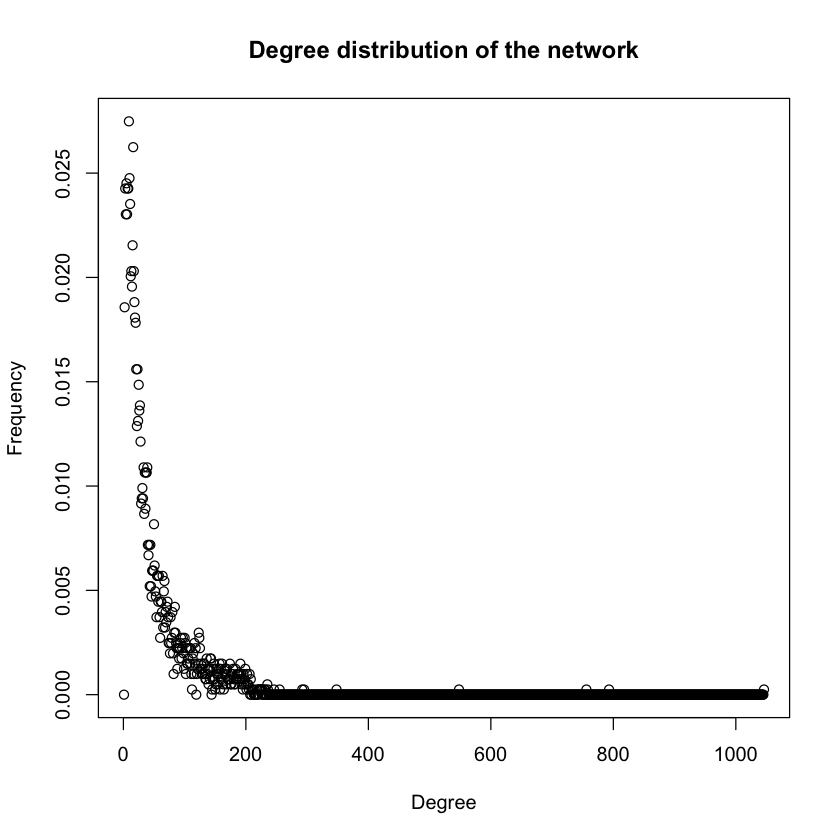

In [12]:
plot(degree.distribution(g),main="Degree distribution of the network",xlab="Degree",ylab="Frequency")

In [11]:
mean(degree(g))

[1] 43.69101

### Question 4: Plot the degree distribution of question 3 in a log-log scale. Try to fit a line to the plot and estimate the slope of the line.
plotting regression line
https://www.theanalysisfactor.com/linear-models-r-plotting-regression-lines/

In [92]:
dis = degree.distribution(g)
num = 0: (length(degree.distribution(g))-1)
indices <- dis > 0
log_dis = log(dis[indices])
log_num = log(num[indices])

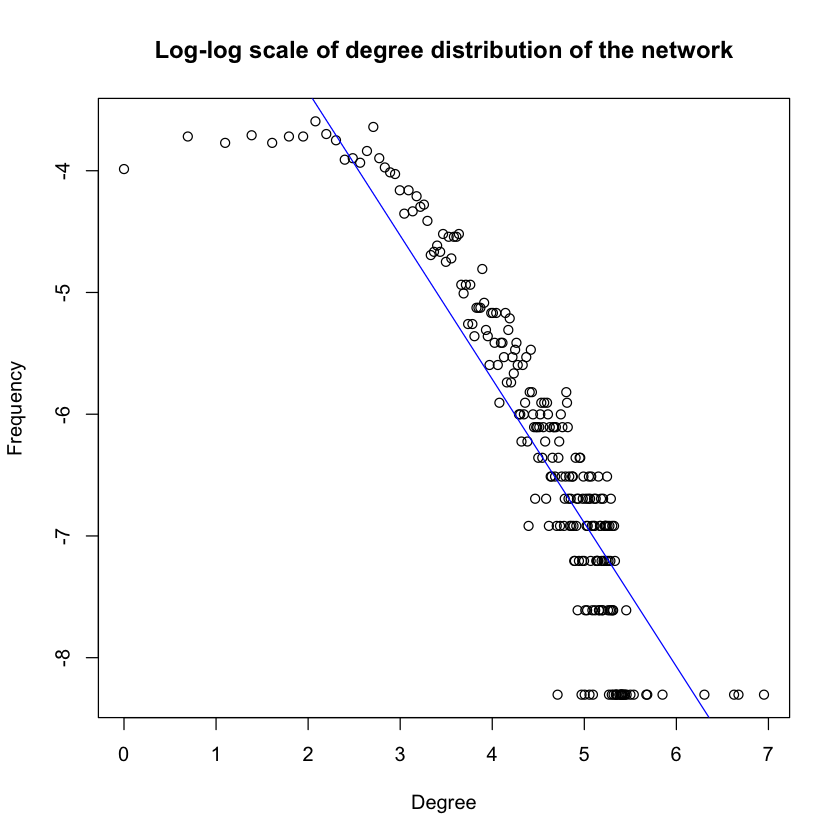

In [98]:
plot(log_num, log_dis, main="Log-log scale of degree distribution of the network",xlab="Degree",ylab="Frequency")

abline(lm (log_dis ~ log_num), col="blue")


In [99]:
lm (log_dis ~ log_num)


Call:
lm(formula = log_dis ~ log_num)

Coefficients:
(Intercept)      log_num  
    -0.9922      -1.1802  


In [125]:
new_indices = log_num > 2 & log_num < 5

log_dis_cut = log_dis[new_indices]
log_num_cut = log_num[new_indices]

In [126]:
new_indices

[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE
 [13]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [25]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [37]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [49]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [61]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [73]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [85]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
 [97]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[109]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[121]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[133]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE
[145]  TRUE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[157] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[169] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[181] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[193] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[205] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[217] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE

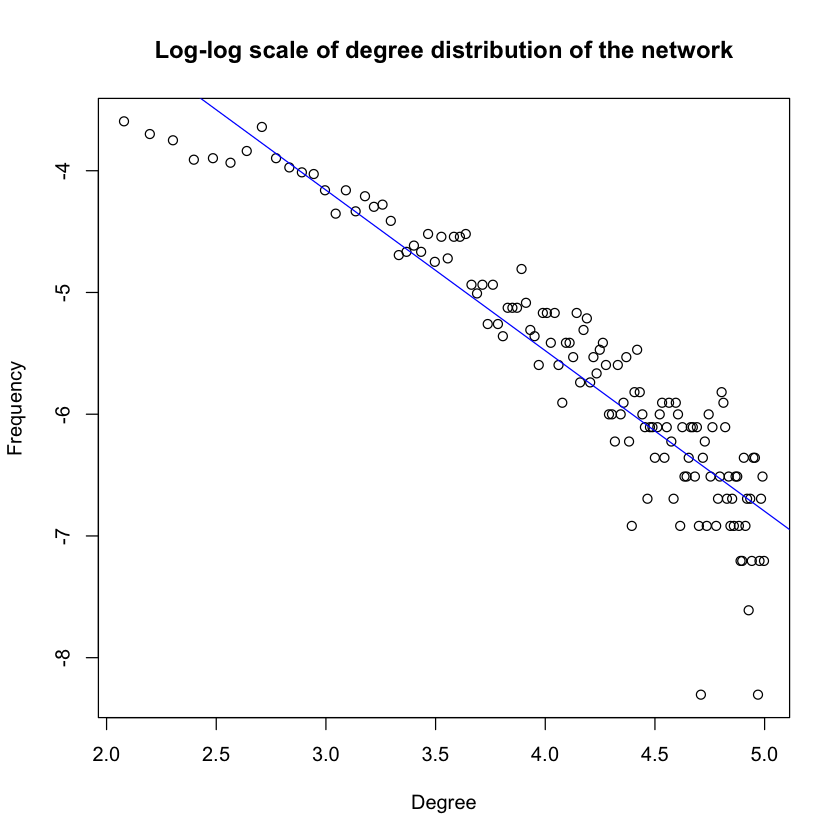

In [129]:
plot(log_num_cut, log_dis_cut, main="Log-log scale of degree distribution of the network",xlab="Degree",ylab="Frequency")
abline(lm(log_dis_cut ~ log_num_cut), col="blue")

In [131]:
lm(log_dis_cut ~ log_num_cut)


Call:
lm(formula = log_dis_cut ~ log_num_cut)

Coefficients:
(Intercept)  log_num_cut  
    -0.2005      -1.3194  


## 1.2 Personalized network

### Question 5: Create a personalized network of the user whose ID is 1. How many nodes and edges does this personalized network have?

[1] 348

[1] 2866

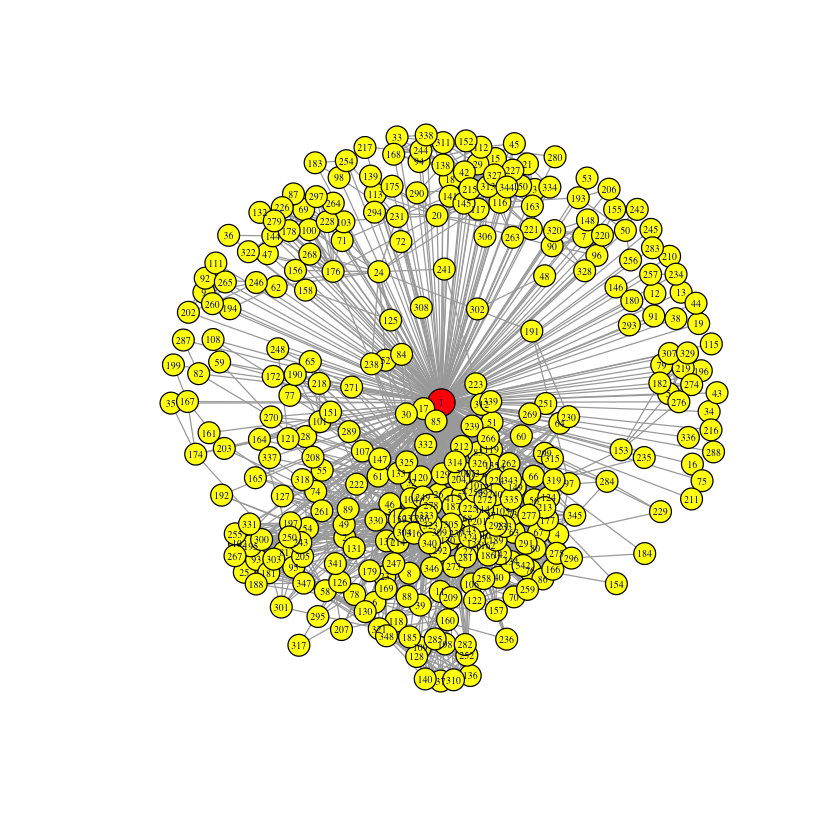

In [139]:
personalized = induced.subgraph(g, c(1, neighbors(g,1)))
size = rep(8,vcount(personalized))
size[1]=10
color = rep("yellow",vcount(personalized))
color[1] ="red"
plot.igraph(personalized,vertex.size=size, vertex.color=color, vertex.label.cex=0.5)


# number of nodes
node_count = vcount(personalized)
node_count

# number of edges
edge_count = ecount(personalized)
edge_count

### Question 6: What is the diameter of the personalized network? Please state a trivial upper and lower bound for the diameter of the personalized network.

In [142]:
diameter(personalized, unconnected=FALSE)

[1] 2

To find the diameter of a graph, first find the shortest path between each pair of vertices. The greatest length of any of these paths is the diameter of the graph.

In [ ]:
#upper bound = 2 (every node is connected to the center)
#lower bound = 0 (no friends)

### Question 7: In the context of the personalized network, what is the meaning of the diameter of the personalized network to be equal to the upper bound you derived in question 6. What is the meaning of the diameter of the personalized network to be equal to the lower bound you derived in question 6?


https://en.wikipedia.org/wiki/Distance_(graph_theory)